In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data/kyphosis.csv")

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
len(df)

81

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [7]:
df.isna().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

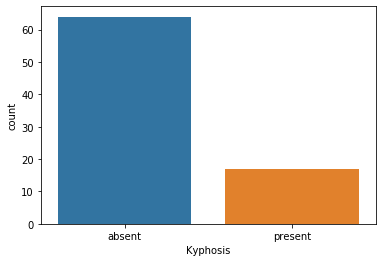

In [9]:
sns.countplot(df["Kyphosis"]);

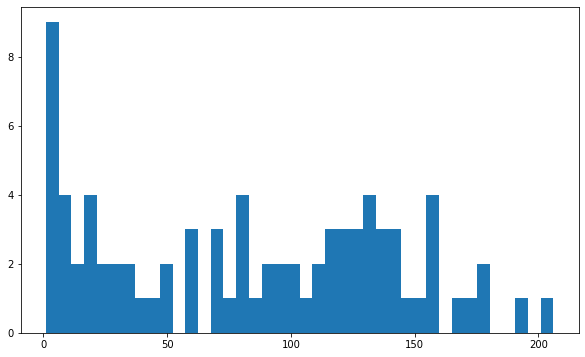

In [12]:
plt.subplots(figsize=(10,6))
plt.hist(df["Age"], bins=40);

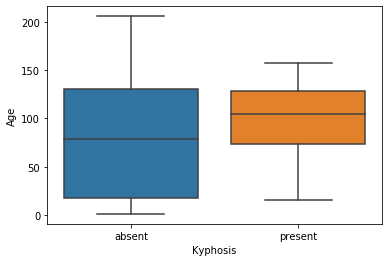

In [14]:
sns.boxplot(df["Kyphosis"],df["Age"]);

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label = LabelEncoder()

In [28]:
t = label.fit_transform(df["Kyphosis"])

In [30]:
df["kypho"] = t

In [31]:
df.head()

,Kyphosis,Age,Number,Start,kypho
0,absent,71,3,5,0
1,absent,158,3,14,0
2,present,128,4,5,1
3,absent,2,5,1,0
4,absent,1,4,15,0


In [33]:
df.drop("Kyphosis", axis=1, inplace=True)

In [15]:
from sklearn.model_selection import train_test_split

In [34]:
X = df.drop("kypho", axis=1)
y = df["kypho"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
np.random.seed(42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
model.score(X_test, y_test)

0.8

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
y_preds = model.predict(X_test)

In [49]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [50]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [52]:
confusion_matrix(y_test, y_preds)

array([[19,  0],
       [ 5,  1]], dtype=int64)